# **Домашнее задание 1**

## Загрузка и предобработка изображений для дальнейшего обучения

Для решения задачи классификации изображений, был собран датасет персонажей популярного мультсериала "Футурама"
Были выбраны 7 персонажей:
* Leela
* Bender
* Philip Fry
* Zoidberg
* Zapp Brannigan
* Amy Wong
Всего удалось собрать 449 картинок персонажей.
Картинки для датасета загружались с помощью парсера, а затем распределялись для каждого персонажа.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/futurama-custom-dataset/futurama/Leela/a61.jpg
/kaggle/input/futurama-custom-dataset/futurama/Leela/a29.jpg
/kaggle/input/futurama-custom-dataset/futurama/Leela/a58.jpg
/kaggle/input/futurama-custom-dataset/futurama/Leela/a23.jpg
/kaggle/input/futurama-custom-dataset/futurama/Leela/405.jpg
/kaggle/input/futurama-custom-dataset/futurama/Leela/a34.jpg
/kaggle/input/futurama-custom-dataset/futurama/Leela/117.jpg
/kaggle/input/futurama-custom-dataset/futurama/Leela/a40.jpg
/kaggle/input/futurama-custom-dataset/futurama/Leela/a15.jpg
/kaggle/input/futurama-custom-dataset/futurama/Leela/a35.jpg
/kaggle/input/futurama-custom-dataset/futurama/Leela/a28.jpg
/kaggle/input/futurama-custom-dataset/futurama/Leela/a20.jpg
/kaggle/input/futurama-custom-dataset/futurama/Leela/a16.jpg
/kaggle/input/futurama-custom-dataset/futurama/Leela/128.jpg
/kaggle/input/futurama-custom-dataset/futurama/Leela/494.jpg
/kaggle/input/futurama-custom-dataset/futurama/Leela/a31.jpg
/kaggle/input/futurama-c

In [2]:
#Определяем рутовый путь
input_folder = '../input/futurama-custom-dataset/futurama/' 

In [3]:
import glob
import pathlib
from tensorflow.keras.applications import MobileNetV2
import tensorflow as tf
#Автоматическая настройка времени выполнения tf.data
AUTOTUNE = tf.data.experimental.AUTOTUNE
#Присваиваем переменную для нашего пути
data_root = pathlib.Path(input_folder)


In [4]:
#Просматриваем названия все директории, наши будущие классы
for item in data_root.iterdir():
    print(item)

../input/futurama-custom-dataset/futurama/Leela
../input/futurama-custom-dataset/futurama/Professor Farnsworth
../input/futurama-custom-dataset/futurama/Amy Wong
../input/futurama-custom-dataset/futurama/Zapp Brannigan
../input/futurama-custom-dataset/futurama/Zoidberg
../input/futurama-custom-dataset/futurama/Fry
../input/futurama-custom-dataset/futurama/Bender


In [5]:
import random
#Получим все пути наших картинок
all_image_paths = list(data_root.glob('*/*'))

#Определим в список все пути наших картинок
all_image_paths = [str(path) for path in all_image_paths]

#Перемешаем в случайном порядке
random.shuffle(all_image_paths)

#Получим общее кол-во наших картинок
image_count = len(all_image_paths)
image_count

449

In [6]:
#Вывод последних 10 путей картинок
all_image_paths[:10]

['../input/futurama-custom-dataset/futurama/Amy Wong/411.jpg',
 '../input/futurama-custom-dataset/futurama/Zoidberg/59.jpg',
 '../input/futurama-custom-dataset/futurama/Leela/a1.png',
 '../input/futurama-custom-dataset/futurama/Leela/a43.jpg',
 '../input/futurama-custom-dataset/futurama/Bender/39.jpg',
 '../input/futurama-custom-dataset/futurama/Leela/44.jpg',
 '../input/futurama-custom-dataset/futurama/Fry/587.jpg',
 '../input/futurama-custom-dataset/futurama/Bender/82.jpg',
 '../input/futurama-custom-dataset/futurama/Bender/111.jpg',
 '../input/futurama-custom-dataset/futurama/Professor Farnsworth/497.jpg']

In [7]:
#Выведем в список все наши классы
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['Amy Wong',
 'Bender',
 'Fry',
 'Leela',
 'Professor Farnsworth',
 'Zapp Brannigan',
 'Zoidberg']

In [8]:
#Присвоим индексы нашим классам
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'Amy Wong': 0,
 'Bender': 1,
 'Fry': 2,
 'Leela': 3,
 'Professor Farnsworth': 4,
 'Zapp Brannigan': 5,
 'Zoidberg': 6}

In [9]:
#Присвоим индекс каждого класса к каждой картинке относящиеся к этому классу
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

#Выведем последние 10 индексов
print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [0, 6, 3, 3, 1, 3, 2, 1, 1, 4]


In [10]:
img_path = all_image_paths[0]
img_path

'../input/futurama-custom-dataset/futurama/Amy Wong/411.jpg'

In [11]:
#Сырые данные
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00...


In [12]:
#Преобразование в тензор изображения
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(100, 100, 3)
<dtype: 'uint8'>


In [13]:
#Установим размер для нашей модели
img_final = tf.image.resize(img_tensor, [100, 100])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(100, 100, 3)
0.0
1.0


In [14]:
#Функция декодирования и изменения размера для нашей модели
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128])
    image /= 255.0  # normalize to [0,1] range

    return image

In [15]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

In [16]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [17]:
print(path_ds)

<TensorSliceDataset shapes: (), types: tf.string>


In [18]:
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

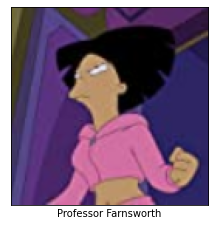

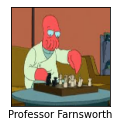

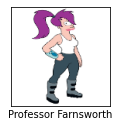

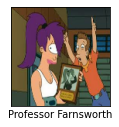

In [42]:
#Отобразим несколько преобразованных картинок
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n, image in enumerate(image_ds.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(all_image_paths[n])
    plt.show()

In [20]:
#Соберем датасет меток
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [21]:
#Выведем метки
for label in label_ds.take(10):
    print(label_names[label.numpy()])

Amy Wong
Zoidberg
Leela
Leela
Bender
Leela
Fry
Bender
Bender
Professor Farnsworth


In [22]:
#Соберем набор данных с помощью метода zip
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [23]:
print(image_label_ds)

<ZipDataset shapes: ((128, 128, 3), ()), types: (tf.float32, tf.int64)>


# **Домашнее задание 2**

## Обучение модели

In [24]:
BATCH_SIZE = 32

# Установка размера буфера перемешивания, равного набору данных, гарантирует
# полное перемешивание данных.
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# `prefetch` позволяет датасету извлекать пакеты в фоновом режиме, во время обучения модели.
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int64)>

In [25]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int64)>

In [26]:
mobile_net = MobileNetV2(input_shape=(128, 128, 3), include_top=False)
mobile_net.trainable=False

9412608/9406464 [==============================] - 0s 0us/step


In [27]:
def change_range(image,label):
    return 2*image-1, label

keras_ds = ds.map(change_range)

In [28]:
image_batch, label_batch = next(iter(keras_ds))

In [29]:
feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)

(32, 4, 4, 1280)


In [30]:
model = tf.keras.Sequential([
  mobile_net,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(len(label_names), activation = 'softmax')])

In [31]:
logit_batch = model(image_batch).numpy()

print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()

print("Shape:", logit_batch.shape)

min logit: 0.00298658
max logit: 0.7944097

Shape: (32, 7)


In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 8967      
Total params: 2,266,951
Trainable params: 8,967
Non-trainable params: 2,257,984
_________________________________________________________________


In [34]:
steps_per_epoch=tf.math.ceil(len(all_image_paths)/BATCH_SIZE).numpy()
steps_per_epoch

15.0

In [35]:
model = model.fit(ds, epochs=15, steps_per_epoch=15)

Train for 15 steps
Epoch 1/15
15/15 [==============================] - 8s 512ms/step - loss: 2.6585 - accuracy: 0.1729
Epoch 2/15
15/15 [==============================] - 5s 347ms/step - loss: 1.8559 - accuracy: 0.3146
Epoch 3/15
15/15 [==============================] - 5s 353ms/step - loss: 1.4144 - accuracy: 0.4667
Epoch 4/15
15/15 [==============================] - 5s 342ms/step - loss: 1.0723 - accuracy: 0.6229
Epoch 5/15
15/15 [==============================] - 5s 343ms/step - loss: 0.9450 - accuracy: 0.6792
Epoch 6/15
15/15 [==============================] - 5s 344ms/step - loss: 0.7712 - accuracy: 0.7292
Epoch 7/15
15/15 [==============================] - 5s 347ms/step - loss: 0.7017 - accuracy: 0.7729
Epoch 8/15
15/15 [==============================] - 5s 346ms/step - loss: 0.6208 - accuracy: 0.7875
Epoch 9/15
15/15 [==============================] - 6s 372ms/step - loss: 0.5510 - accuracy: 0.8208
Epoch 10/15
15/15 [==============================] - 5s 361ms/step - loss: 0.5018

In [36]:
print(model.history.keys())

dict_keys(['loss', 'accuracy'])


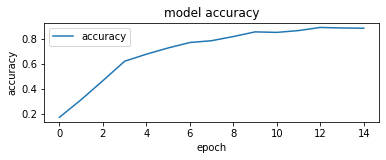

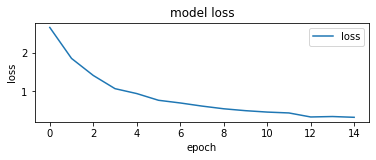

In [37]:
plt.subplot(211)  
plt.plot(model.history['accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['accuracy']) 
plt.show()

plt.subplot(212)  
plt.plot(model.history['loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['loss'], loc='upper right') 
plt.show()
